In [20]:
import numpy as np
import pandas as pd


from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions


import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("pima-indians-diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Let's look at glucose since it's the strongest predictor on this set

In [7]:
colors = ['red' if outcome == 0 else 'blue' for outcome in df.Outcome]

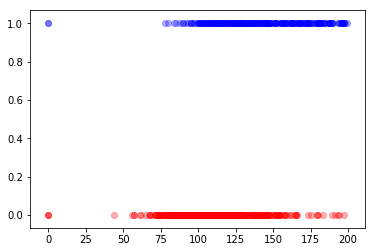

In [10]:
for point, label, color in zip(df.Glucose, df.Outcome, colors):
    plt.scatter(point, label, c=color, alpha=0.3)
plt.show()

In [12]:
x, y = df.drop("Outcome", axis=1), df.Outcome

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [11]:
svm = LinearSVC()

In [15]:
svm.fit(xtrain, ytrain)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [19]:
results = classification_report(ytest, svm.predict(xtest))
print(results)

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       102
           1       0.00      0.00      0.00        52

    accuracy                           0.66       154
   macro avg       0.33      0.50      0.40       154
weighted avg       0.44      0.66      0.53       154



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
